# Breast Cancer Tumor Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
sns.set_theme()

In [ ]:
#install seaborn
!pip install seaborn

#install scikit-learn
!pip install scikit-learn

In this project, I used the [Diagnostic Wisconsin Breast Cancer Database](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic), stored in the UC Irvine ML repository and build a decision tree model to classify whether a tumor is malignant (cancerous) or benign (non-cancerous). I also built a KNN and naive bayes model to compare against my decision tree model.<br/>


Target Variable ==> Malignant = 0. | Benign = 1 <br/>

In [ ]:
bc_data = load_breast_cancer(as_frame=False)
print(bc_data.DESCR[27:2908])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-M

I began by briefly exploring the data. To do this, I will use the ten worst/largest features and plotted a scatter matrix (pairplot) of these features using `sns.pairplot()`. I  colored the scatter plots with the target variable.

In [ ]:
meanfeatures_df = pd.DataFrame(data=bc_data.data[:,20:], columns=bc_data.feature_names[20:])
meanfeatures_df["target"] = bc_data.target

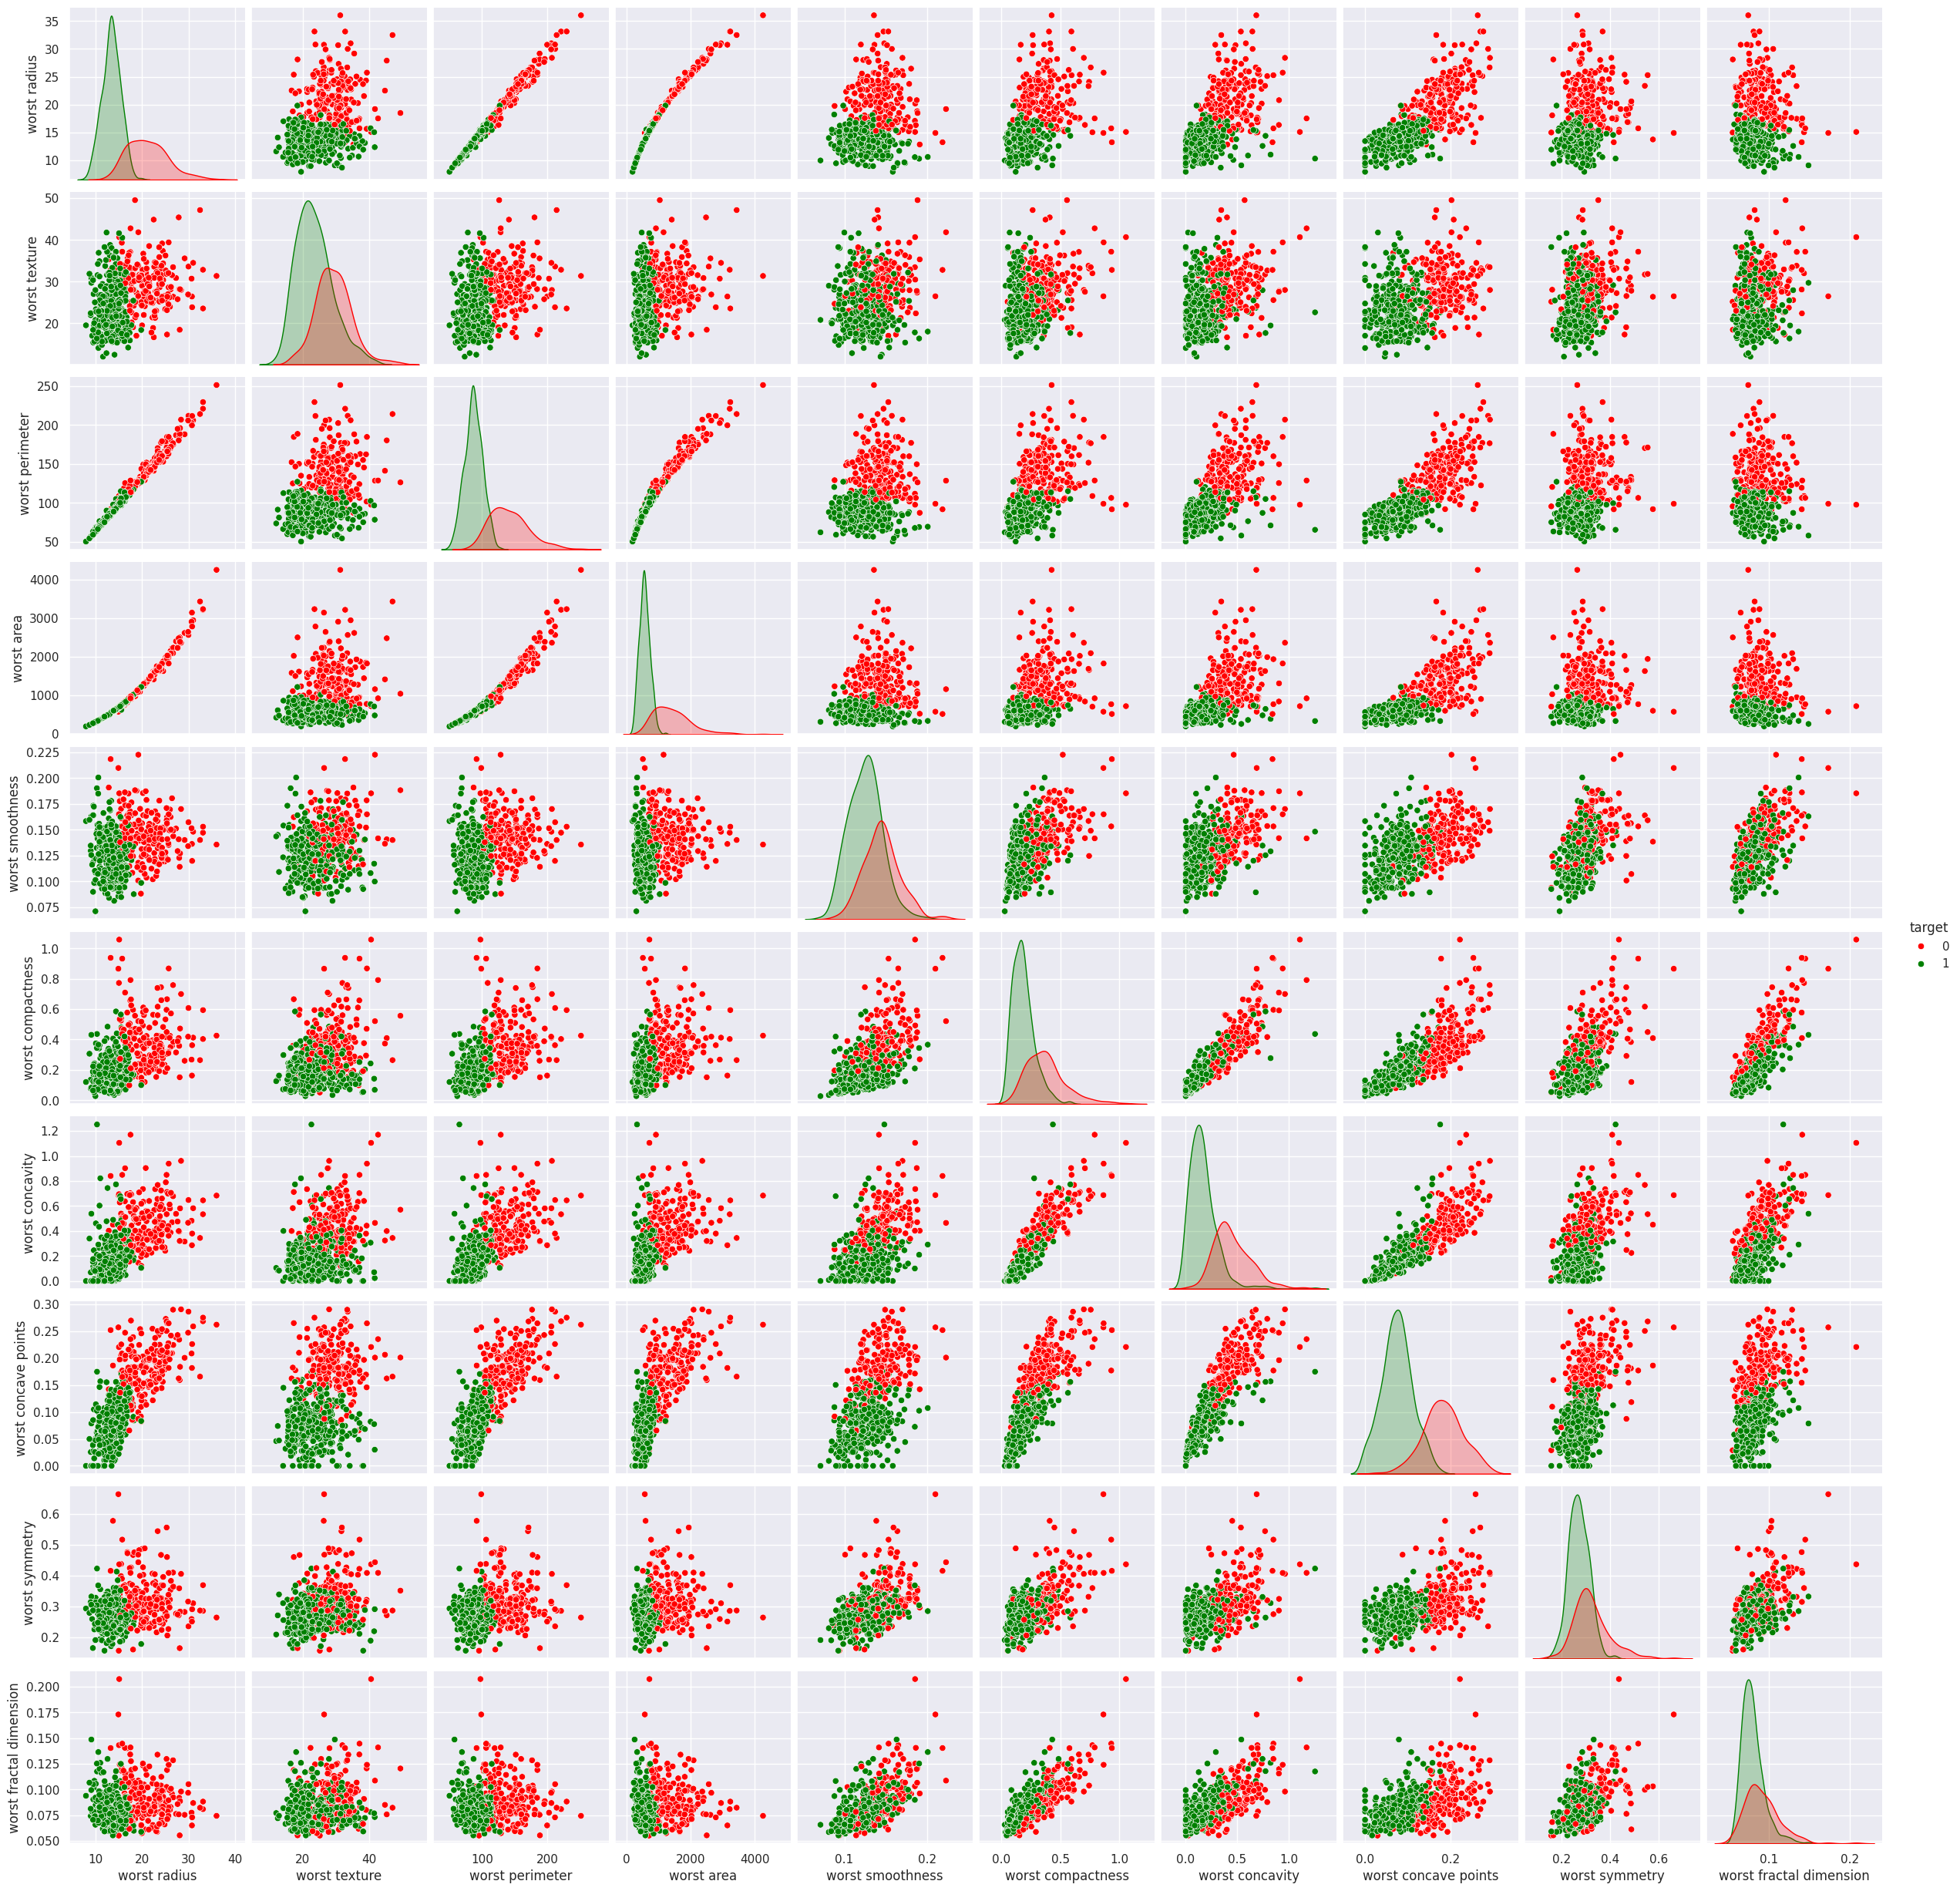

In [ ]:
sns.pairplot(meanfeatures_df, hue='target', palette={0: 'red', 1: 'green'})
plt.show()



In the pairplot, I observed a distinction between malignant and benign tumors, which were indicated by red and green points within the plot. Additionally, I noticed distributions and correlations of different features in the plot which helped me better understand the data set. For example, features like radius, area, and perimeter are highly correlated. Another example included that for radius, malignant tumors had a wider distribution with higher values compared to benign tumors.

This visualization is useful for building our decision tree model because it helps with selecting which features are strong predictors in deciding whether a tumor is benign or malignant. For example, radius and perimeter are strong predictors because they show clear separation between classes. Additionally, the pairplot also helps to visualize the relationships between different features, which helps get a better understanding of how the decision tree might split the data to classify tumors. Also, the decision tree can be simplified by using the pairplot to see highly correlated features, which can be used to remove redundant features within the tree.

Using sci-kit learn's `DecisionTreeClassifier` class with `random_state=3`, I have fitted a model between features `X_train` and targets `y_train` and used the function `print_tree(model, filled=tree)` to visually inspect the trained decision tree model.


In [ ]:
X = bc_data.data
y = bc_data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

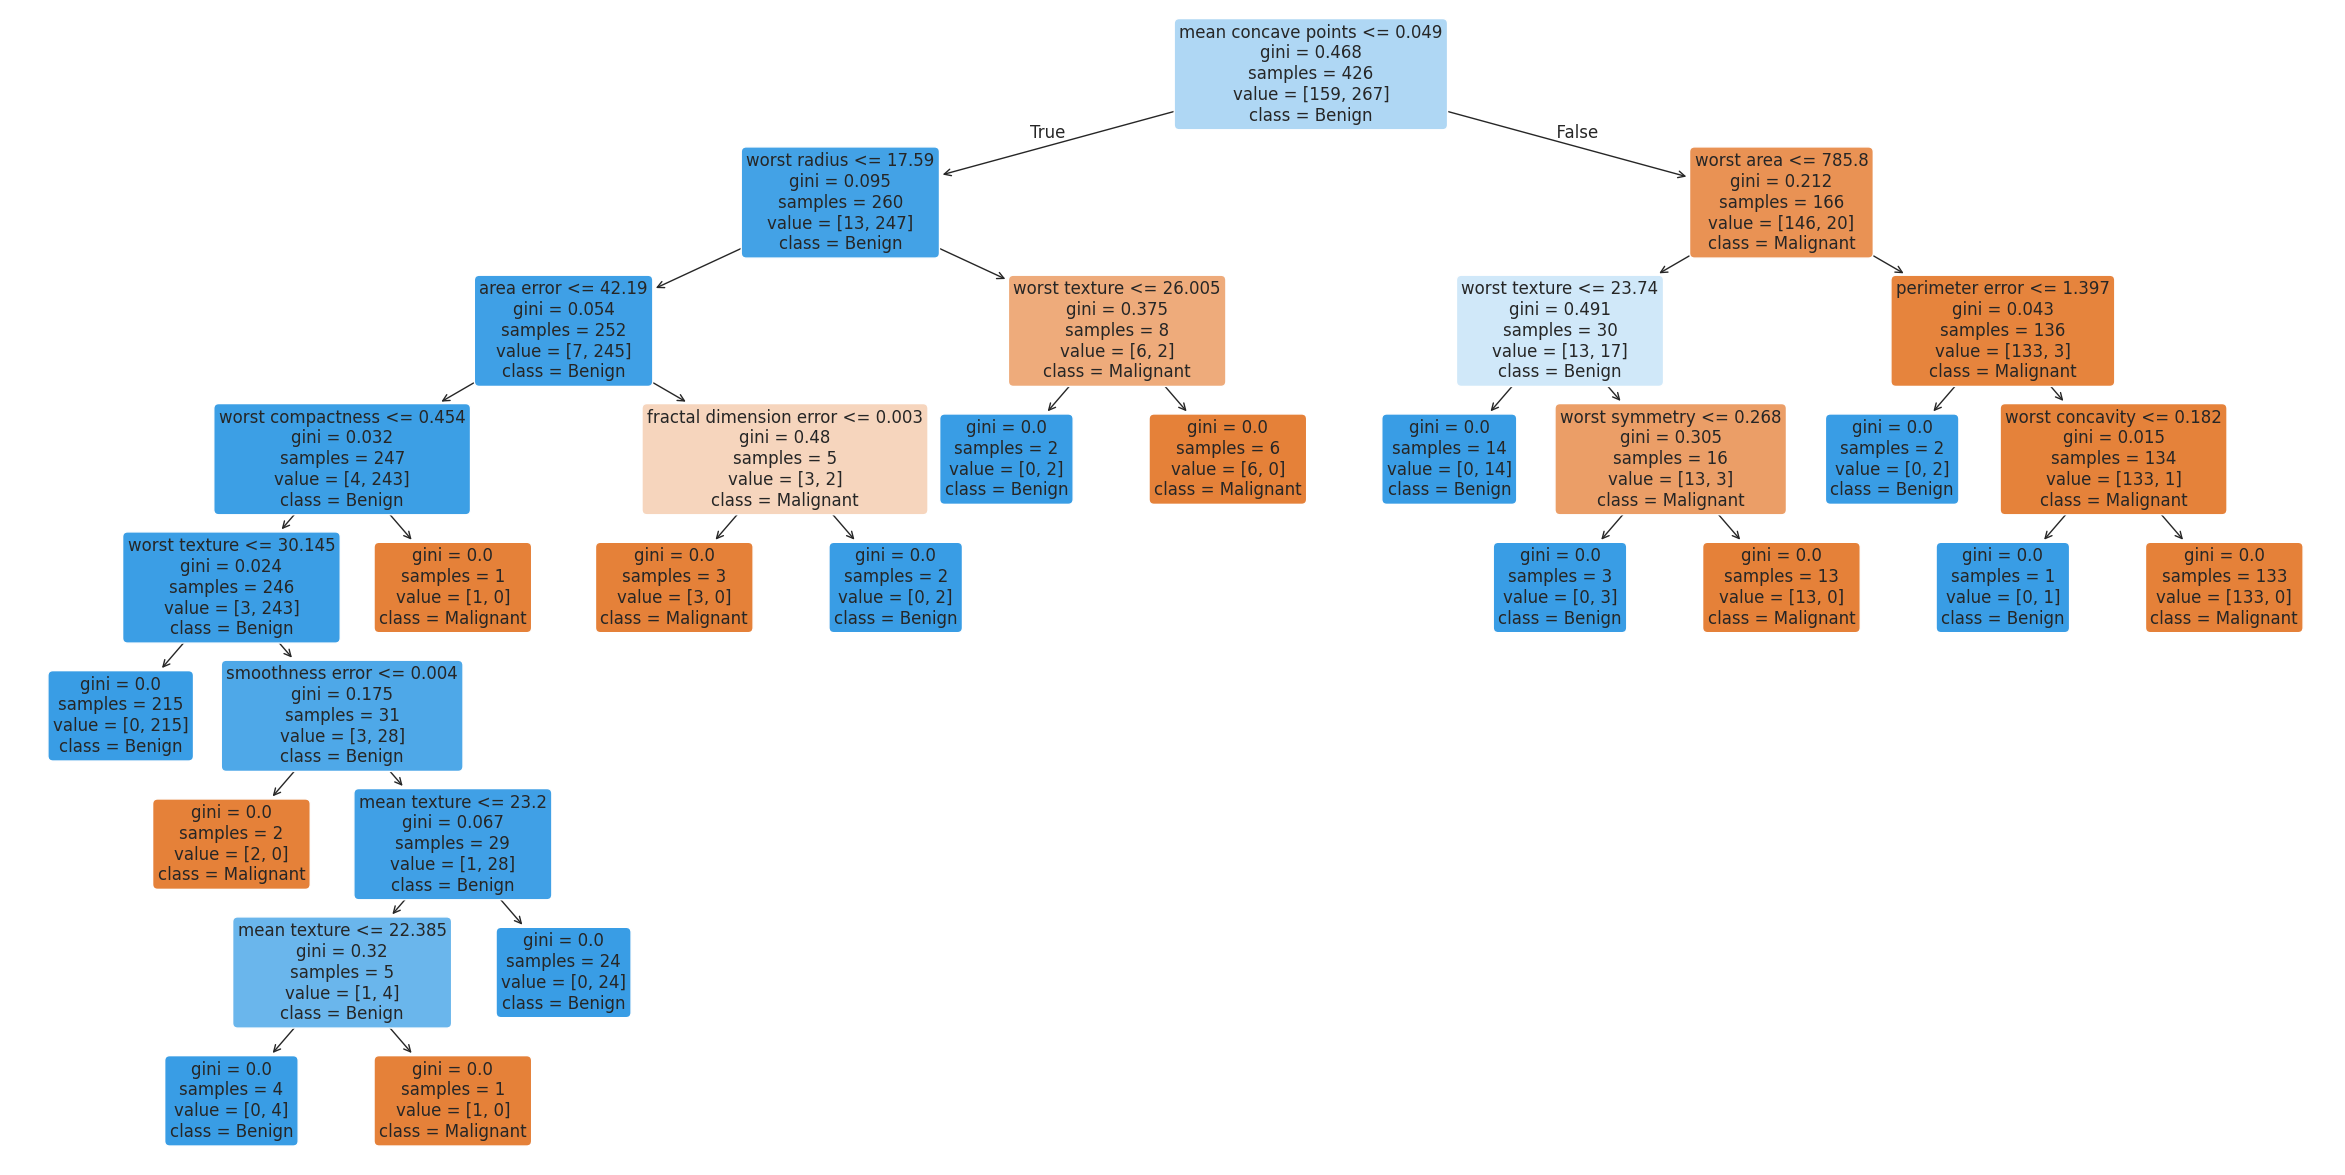

8


In [ ]:
model = DecisionTreeClassifier(random_state=3)
model.fit(X_train, y_train)

plt.figure(figsize=(30, 15))
plot_tree(model, filled=True, feature_names=bc_data.feature_names, class_names=['Malignant', 'Benign'], rounded=True, fontsize=12)
plt.show()

depth = model.get_depth()
print(f"{depth}")


Through our decision tree, here are a few sample probabilities that we can calculate that could potentially be helpful in diagnosing a tumor as benign or malignant.

1. `P(y=Benign)` = 357/569 =~ 0.627

2. `P(y=Malignant | Mean Concave Points > 0.049)` = 146/166 =~ 0.879

3. `P(y=Malignant | Mean Concave Points <= 0.049, Mean Radius <= 17.59)` = 13/260 = 0.05

4. `P(y=Benign| Mean Concave Points <= 0.049, Worst Radius > 17.59, Worst Texture <= 26.005)` = 2/2 = 1

Again using sci-kit learn's `DecisionTreeClassifier` class with `random_state=3` and `max_depth=3`, I have fitted a model between features `X_train` and targets `y_train` and used the function `plot_tree(model)` to visually inspect the pruned decision tree model.

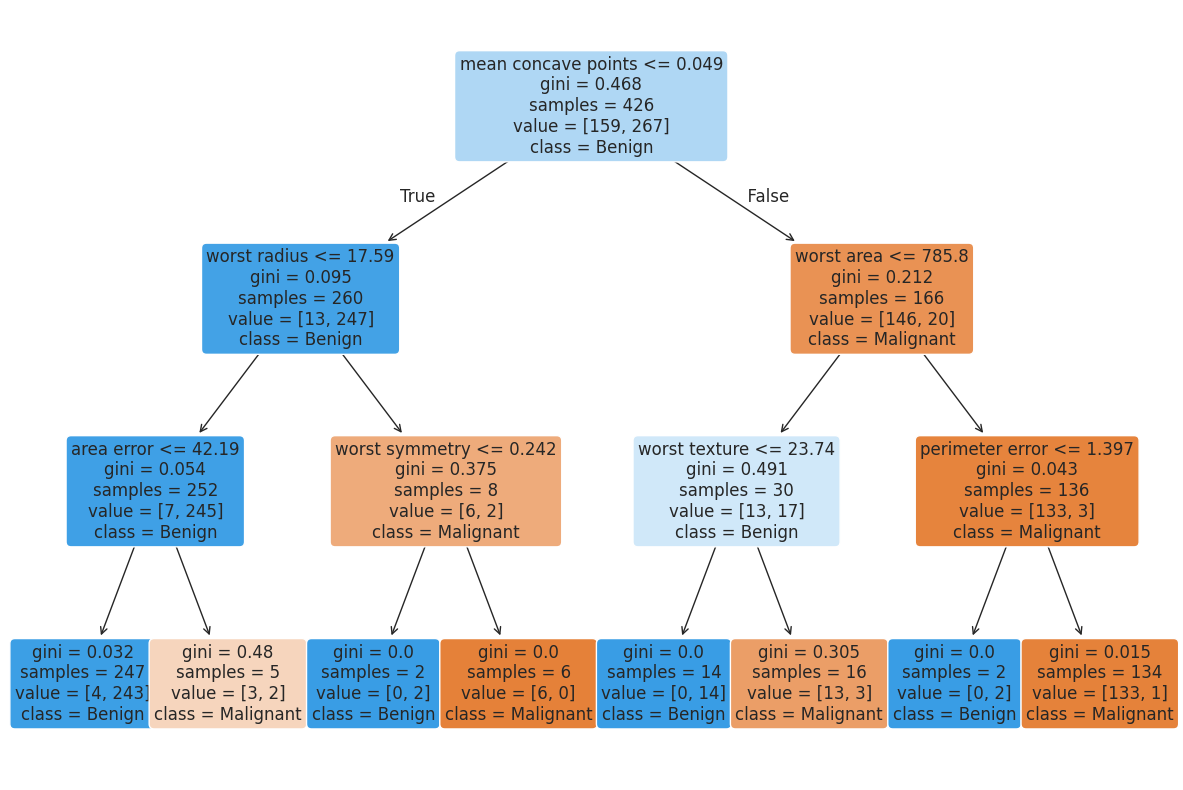

In [ ]:
tree_depth_3 = DecisionTreeClassifier(random_state=3, max_depth=3)
tree_depth_3.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree_depth_3, filled=True, feature_names=bc_data.feature_names, class_names=['Malignant', 'Benign'], rounded=True, fontsize=12)
plt.show()



For one instance of x, given a mean concave points <= 0.049, a worst radius <= 17.59, and an area error <= 42.19, then the model with max depth of 3 will predict that the tumor is benign (y = Benign or y = 0). However, in the model trained earlier, if we take into account other features that were not in the pruned decision tree model, such as fractal dimension error <= 0.003, then the prediction suggests that the tumor is malignant (y = Malignant or y = 1), which is important to note.

Now to look more closely at the model's performance from my tree, I created a classification table (confusion matrix) for the training data and testing data. I set `tree_classifier` equal to my decision tree model object created before. After, I calculated the precision in the training data, the recall (sensitivity) in the training data, the false negative rate (FNR) in the testing data, and the false positive rate (FPR) in the testing data.

0.9849
0.9775
0.1222
0.0189


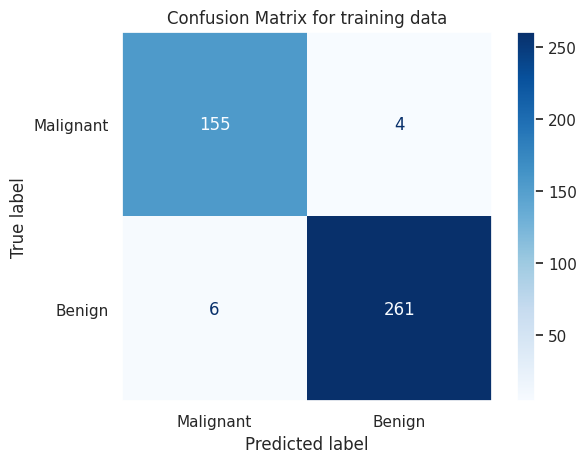

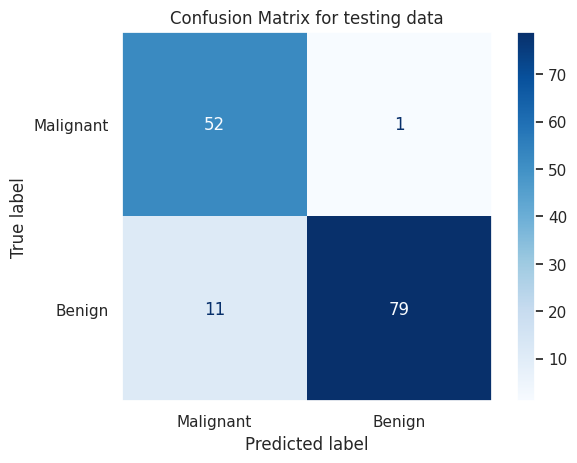

In [ ]:
tree_classifier = tree_depth_3

sklearn.metrics.ConfusionMatrixDisplay.from_estimator(tree_classifier, X_train, y_train, display_labels=["Malignant", "Benign"], cmap="Blues")
plt.grid(False)
plt.title("Confusion Matrix for training data")

sklearn.metrics.ConfusionMatrixDisplay.from_estimator(tree_classifier, X_test, y_test, display_labels=["Malignant", "Benign"], cmap="Blues")
plt.grid(False)
plt.title("Confusion Matrix for testing data")

#precision
precision_train = precision_score(y_train, tree_classifier.predict(X_train))
print(f"{precision_train:.4f}")

#recall (sensitivity) in training data
recall_train = recall_score(y_train, tree_classifier.predict(X_train))
print(f"{recall_train:.4f}")

#false negative rate in testing data
fnr_test = 1 - recall_score(y_test, tree_classifier.predict(X_test))
print(f"{fnr_test:.4f}")

#false positive rate in testing data
tn, fp, fn, tp = confusion_matrix(y_test, tree_classifier.predict(X_test)).ravel()
fpr_test = fp / (fp + tn)
print(f"{fpr_test:.4f}")


1.   The precision in the training data is 0.8687.
2.   The recall (sensitivity) in the training data was 0.9053.
3.   The False Negative Rate (FNR) was 0.2000.
4.   The False Positive Rate (FPR) was 0.0500.

For every value of `max_depth` from 1 to 8 (inclusive), I trained a decision tree classifer on `x_train` and `y_train` and created a scatterplot with `max_depth` on the horizontal axis and model accuracy on the vertical axis.

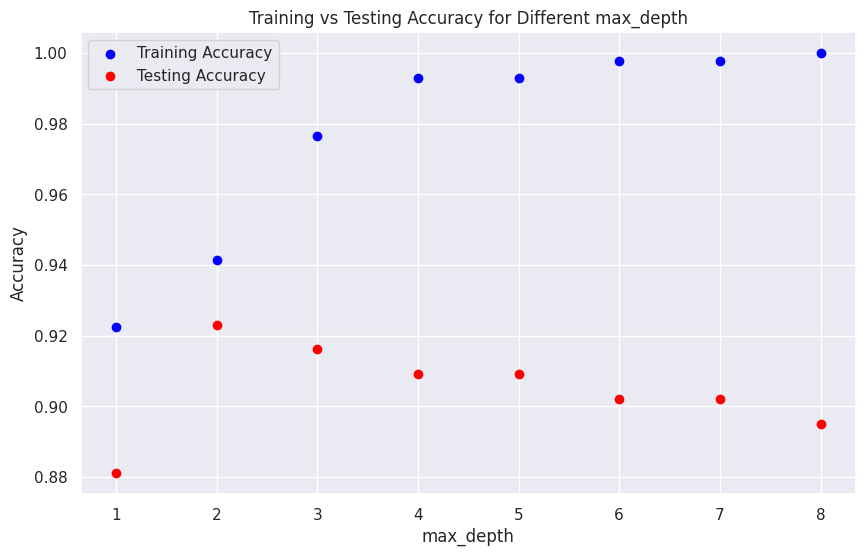

Best max_depth: 2
Best Decision Tree Train Accuracy: 0.9413145539906104
Best Decision Tree Test Accuracy: 0.9230769230769231


In [ ]:
train_accuracies = []
test_accuracies = []

for max_depth in range(1, 9):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=3)
    model.fit(X_train, y_train)

    # Predict on training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    #calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    #add the results to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.scatter(range(1, 9), train_accuracies, label="Training Accuracy", color="blue", marker="o")
plt.scatter(range(1, 9), test_accuracies, label="Testing Accuracy", color="red", marker="o")
plt.title("Training vs Testing Accuracy for Different max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(range(1, 9))
plt.legend()
plt.grid(True)
plt.show()

best_depth = np.argmax(test_accuracies) 
dt_test_accuracy = test_accuracies[best_depth]
dt_train_accuracy = train_accuracies[best_depth]

print(f"{dt_train_accuracy}")
print(f"{dt_test_accuracy}")


Based on my scatterplot, the value of the max depth should be equal to 1, despite the testing accuracy being the same as the max-depth increases. Specifically, we want to choose a max depth that maximizes the testing accuracy to ensure that our model properly generalizes unseen data. Since testing accuracy stays the same as max depth increases, adding more depth only makes our model more complicated and only improves training accuracy. We want to choose the smallest max depth (i.e max_depth = 1) to avoid overfitting and make our model more simple.